In [103]:
import pandas as pd
import numpy as np
from ggplot import *
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [104]:
cols = ["date_time", "srch_ci", "posa_continent", "user_location_country", "orig_destination_distance", \
       "is_mobile", "is_package", "hotel_country", "hotel_continent", "is_booking", "cnt"]

datecols = ["date_time", "srch_ci"]

expedia = pd.read_csv("train.csv", usecols=cols, header=0, parse_dates=datecols, nrows=10000)

In [105]:
expedia.columns = ["search_date", "user_continent", "user_country", "dest_dist", "mobile", "package", "ci_date", \
                  "booking", "history", "hotel_continent", "hotel_country"]

In [106]:
expedia["search_month"] = expedia.search_date.dt.month
expedia["ci_month"] = expedia.ci_date.dt.month
expedia["ci_day"] = expedia.ci_date.dt.day
expedia["advance"] = (expedia["ci_date"]-expedia["search_date"]).astype('timedelta64[D]')

In [107]:
#ratio of mobile users
print expedia["mobile"].mean()

#ratio of successful orders
print expedia["booking"].mean()

#ratio of packaged orders
print expedia["package"].mean()

0.2066
0.0777
0.2201


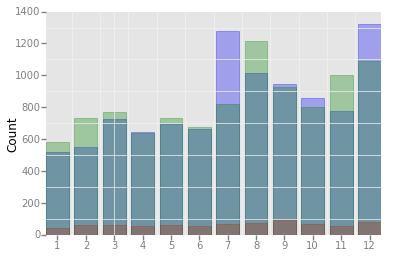

<ggplot: (8770536474337)>

In [108]:
#monthly viewing, booking and C/I pattern
ggplot(aes(x="search_month"), data=expedia) +\
    geom_bar(fill="blue", alpha=0.3) +\
    geom_bar(aes(x="search_month"), data=expedia[expedia.booking==1], fill="red", alpha=0.3) +\
    geom_bar(aes(x="ci_month"), data=expedia, fill="green", alpha=0.3) +\
    labs(x=" ", y="Count")
#     scale_fill_manual(labels=["1", "2", "3"])

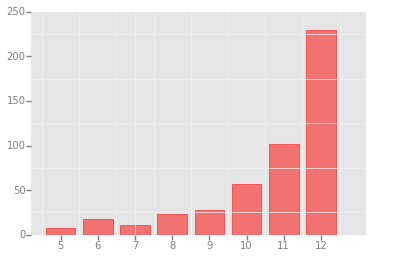

<ggplot: (8770536233333)>

In [114]:
#when do people look for hotels for Christmas season.
mask_christmas = (expedia.ci_month==12) & (expedia.ci_day > 20)
ggplot(aes(x="search_month"), data=expedia[mask_christmas]) +\
    geom_bar(stat="identity", fill="red", alpha=0.5) +\
    scale_x_discrete(name=" ")

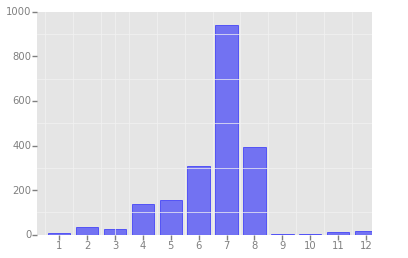

<ggplot: (8770536166273)>

In [116]:
#when do people look for hotels for summer vacation
mask_summer = expedia.ci_month.isin([7, 8])
ggplot(aes(x="search_month"), data=expedia[mask_summer]) +\
    geom_bar(fill="blue", alpha=0.5) +\
    scale_x_discrete(name=" ", limits=(0, 12))

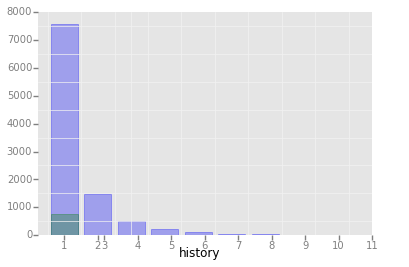

<ggplot: (8770535967973)>

In [119]:
#the distribution of how many searches the customer has made
ggplot(aes(x="history"), data=expedia) +\
    geom_bar(stat="identity", fill="blue", alpha=0.3) +\
    geom_bar(aes(x="history"), data=expedia[expedia.booking==1], stat="identity", fill="green", alpha=0.3) +\
    scale_x_discrete(limits=(0,10))

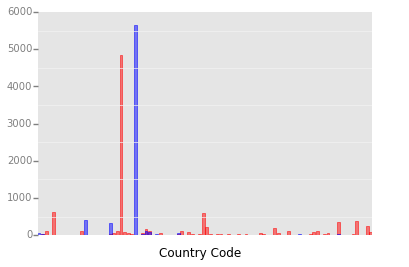

<ggplot: (8770535932933)>

In [120]:
#plotting user country and hotel country together, a clear pairing pattern appears, meaning users mostly search for domestic hotels
ggplot(aes(x="hotel_country"), data=expedia) +\
    geom_bar(stat="identity", fill="red", alpha=0.5) +\
    geom_bar(aes(x="user_country"), stat="identity", fill="blue", alpha=0.5) +\
    scale_y_continuous(limits=(0,6000)) +\
    scale_x_discrete(name="Country Code", breaks=[0])

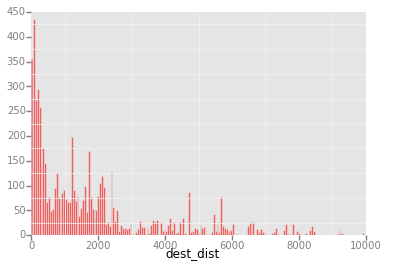

<ggplot: (8770529319625)>

In [133]:
#how far is the search
ggplot(aes(x="dest_dist"), data=expedia) +\
    geom_histogram(bins=200, fill="red", alpha=0.6) +\
    scale_x_continuous(limits=(0, 10000))

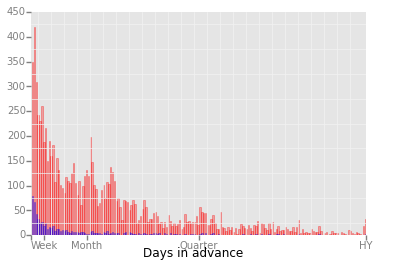

<ggplot: (8770531106377)>

In [130]:
#print out the distribution of days of searching before C/I, aka "advance"
p = ggplot(aes(x="advance"), data=expedia) +\
    geom_bar(stat="bin", fill="red", alpha=0.3) +\
    geom_bar(data=expedia[expedia.booking==1], fill="blue", alpha=0.3) +\
    scale_x_continuous(name="Days in advance", limits=(0, 180), breaks=[0, 7, 30, 90, 180], labels=["", "Week", "Month", "Quarter", "HY"])
p
# ggplot.save(p, "advance_hist")